# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
import importlib
import csv
import json


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# # List for holding lat_lngs and cities
# lat_lngs = []
# cities = []

# # Create a set of random lat and lng combinations
# lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
# lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
# lat_lngs = zip(lats, lngs)

# # Identify nearest city for each lat, lng combination
# for lat_lng in lat_lngs:
#     city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
#     # str.title(city)

#     # If the city is unique, then add it to a our cities list
#     if city not in cities:
#         cities.append(city)

# # # Print the city count to confirm sufficient count
# len(cities)

In [3]:
# cities_df = pd.DataFrame(cities,columns=["City"])
# print(cities_df)

In [4]:
# cities_df.to_csv ("cities.csv", index = False, header=True)

In [5]:
cities_imported = pd.read_csv("cities.csv")

In [6]:
print(cities_imported)

                City
0           matangad
1            sambava
2            rikitea
3             hobart
4    haines junction
..               ...
610    pointe michel
611            avera
612           rawson
613        morondava
614             lata

[615 rows x 1 columns]


In [7]:
cities_test = cities_imported[0:5]
print(cities_test)

              City
0         matangad
1          sambava
2          rikitea
3           hobart
4  haines junction


In [8]:
cities_df = pd.DataFrame(cities_imported)
cities_df["ID"] = ""
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Max Temp"] = ""
cities_df["Humidity"] = ""
cities_df["Cloudiness"] = ""
cities_df["Wind Speed"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [9]:
# Parameter for OpenWeather API
params = {"key": weather_api_key}

# Parameter for Google Maps API
# params = {
#     "Lat": "lat",
#     "Lng": "lon",
#     "Country": "country",
#     "key": gkey
# }

In [10]:
# Perform a weather check on each city using a series of successive API calls.

city = cities_imported["City"]
citydata_df=pd.DataFrame(columns=["ID","Lat","Long","Max Temp","Humidity","Cloudiness","Wind","Country","Date"],index=city)
weather_response_list = []

for row in cities_imported["City"]:

    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    city = row
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    weather_response = requests.get(query_url).json()
    if weather_response['cod'] != 200:
        continue

    lat = weather_response['coord']['lat']
    lng = weather_response['coord']['lon']
    max_temp = weather_response['main']['temp_max']
    humidity = weather_response['main']['humidity']
    cloudiness = weather_response['clouds']['all']
    wind_speed = weather_response['wind']['speed']
    country = weather_response['sys']['country']
    city_id = weather_response['id']
    date_info =time.ctime(weather_response['dt'])

    citydata_df.loc[city]=[city_id,lat,lng,max_temp,humidity,cloudiness,wind_speed,country,date_info]

citydata_df.dropna(inplace=True)

print(citydata_df)


                      ID      Lat     Long Max Temp Humidity Cloudiness  \
City                                                                      
matangad         1700433   8.5769   124.37    78.76       79        100   
sambava          1056899 -14.2667  50.1667    66.96       79          3   
rikitea          4030556 -23.1203 -134.969    75.61       74          2   
hobart           2163355 -42.8794  147.329    52.11       87          0   
haines junction  5969025  60.7522 -137.511    70.54       34         40   
...                  ...      ...      ...      ...      ...        ...   
pointe michel    3575660    15.25 -61.3833    79.09       74         39   
avera            4231997   33.194 -82.5271    87.31       53          6   
rawson           3839307 -43.3002 -65.1023    50.18       67         70   
morondava        1058381 -20.2833  44.2833    67.57       75          0   
lata             2738381  40.1629  -8.3327    59.81       78          1   

                  Wind C

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
citydata_df.to_csv("output.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#  Get the indices of cities that have humidity over 100%.
# num_humidity = np.array(citydata_df["Humidity"])
# idx = np.nonzero(num_humidity>100)
# idxlist = np.array(idx).tolist()
# print(idxlist)

In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = citydata_df
print(clean_city_data)

                      ID      Lat     Long Max Temp Humidity Cloudiness  \
City                                                                      
matangad         1700433   8.5769   124.37    78.76       79        100   
sambava          1056899 -14.2667  50.1667    66.96       79          3   
rikitea          4030556 -23.1203 -134.969    75.61       74          2   
hobart           2163355 -42.8794  147.329    52.11       87          0   
haines junction  5969025  60.7522 -137.511    70.54       34         40   
...                  ...      ...      ...      ...      ...        ...   
pointe michel    3575660    15.25 -61.3833    79.09       74         39   
avera            4231997   33.194 -82.5271    87.31       53          6   
rawson           3839307 -43.3002 -65.1023    50.18       67         70   
morondava        1058381 -20.2833  44.2833    67.57       75          0   
lata             2738381  40.1629  -8.3327    59.81       78          1   

                  Wind C

In [14]:
northern=clean_city_data.loc[clean_city_data["Lat"] >=0,]
n_hemi_data = pd.DataFrame(northern)
print(n_hemi_data)


                      ID      Lat     Long Max Temp Humidity Cloudiness  \
City                                                                      
matangad         1700433   8.5769   124.37    78.76       79        100   
haines junction  5969025  60.7522 -137.511    70.54       34         40   
abha              110690  18.2164  42.5053    70.05       11          0   
ingham           4997130     42.6 -84.3833    72.16       67         90   
iqaluit          5983720  63.7506 -68.5145    40.69       75         97   
...                  ...      ...      ...      ...      ...        ...   
boksitogorsk      575410   59.474  33.8485    70.48       67         12   
halifax          6324729  44.6453 -63.5724    69.69       55         20   
pointe michel    3575660    15.25 -61.3833    79.09       74         39   
avera            4231997   33.194 -82.5271    87.31       53          6   
lata             2738381  40.1629  -8.3327    59.81       78          1   

                  Wind C

In [15]:
southern = clean_city_data.loc[clean_city_data["Lat"] < 0,]
s_hemi_data = pd.DataFrame(southern)

print(s_hemi_data)

                    ID      Lat     Long Max Temp Humidity Cloudiness   Wind  \
City                                                                           
sambava        1056899 -14.2667  50.1667    66.96       79          3   9.84   
rikitea        4030556 -23.1203 -134.969    75.61       74          2  10.56   
hobart         2163355 -42.8794  147.329    52.11       87          0      4   
vaini          4032243    -21.2   -175.2    68.16       88         75   4.61   
henties bay    3356832  -22.116  14.2845    55.85       85          0   6.58   
...                ...      ...      ...      ...      ...        ...    ...   
nsanje          924572   -16.92   35.262    64.24       86         50   2.19   
fuerte olimpo  3438102 -21.0415 -57.8738     83.8       40         32   9.71   
isangel        2136825   -19.55  169.267    74.68       55          7   18.9   
rawson         3839307 -43.3002 -65.1023    50.18       67         70   8.41   
morondava      1058381 -20.2833  44.2833

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

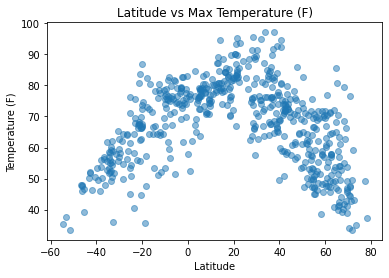

In [16]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Latitude vs Max Temperature (F)")

plt.scatter(x_values, y_values, alpha=0.5)
plt.show()

## Latitude vs. Humidity Plot

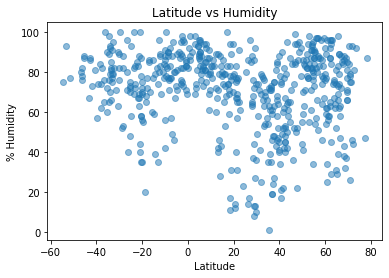

In [17]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("% Humidity")
plt.title("Latitude vs Humidity")

plt.scatter(x_values, y_values, alpha=0.5)
plt.show()

## Latitude vs. Cloudiness Plot

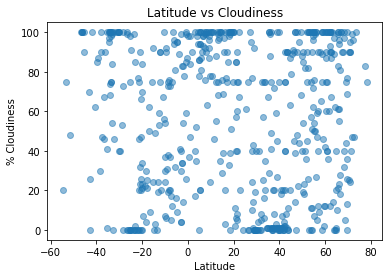

In [18]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("% Cloudiness")
plt.title("Latitude vs Cloudiness")

plt.scatter(x_values, y_values, alpha=0.5)
plt.show()

## Latitude vs. Wind Speed Plot

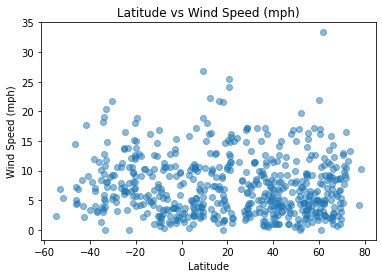

In [19]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Wind"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs Wind Speed (mph)")

plt.scatter(x_values, y_values, alpha=0.5)
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [20]:
# def regression_line():
#     (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#     regress_values = x_values * slope + intercept
#     line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#     plt.scatter(x_values,y_values)
#     plt.plot(x_values,regress_values,"r-")
#     plt.annotate(line_eq,(6,10),fontsize=15,color="red")

In [23]:
x_values = n_hemi_data["Lat"]
y_values = n_hemi_data["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Latitude vs Max Temperature (F)")

slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.scatter(x_values, y_values)
plt.show()

NameError: name 'stats' is not defined

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

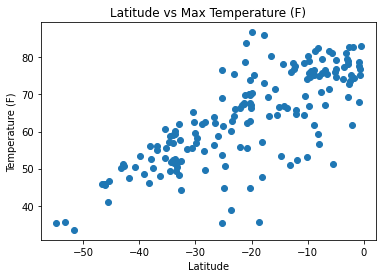

In [45]:
x_values = s_hemi_data["Lat"]
y_values = s_hemi_data["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Latitude vs Max Temperature (F)")

plt.scatter(x_values, y_values)
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression